# Identitas Diri
- Nama: Muhammad Nur Aziz
- NIM: 2341720237
- Kelas: TI-3F
- Absen: 22
- Studi Kasus House Price Clusterring

# Download Dataset House Price Clustering

In [ ]:
from IPython.display import clear_output
!pip install gdown
clear_output()
!gdown --id "1DZXaXbu79BSxWG7AnmeJyYbkKNUa8NSe"

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DZXaXbu79BSxWG7AnmeJyYbkKNUa8NSe
To: /content/1_house_prince_advance.csv
100% 944k/944k [00:00<00:00, 111MB/s]


#Pra Pengolahan Data (30 Poin)

1. Load dataset. (5 poin)
2. Drop kolom 'Id' dan 'MSSubClass' (5 poin)
3. Drop semua variabel kualitatif (5 poin)
4. Drop variabel dengan nilai kosong kurang dari 5 (5 poin)
5. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut. (10 poin)

#Load Data Set

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score

In [ ]:
df = pd.read_csv('/content/1_house_prince_advance.csv')
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Drop kolom 'Id' dan 'MSSubClass'

In [ ]:
df = df.drop(['Id', 'MSSubClass'], axis=1)


# Drop semua variabel kualitatif

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
df = df.drop(object_cols, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2433 non-null   float64
 1   LotArea        2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   YearBuilt      2919 non-null   int64  
 5   YearRemodAdd   2919 non-null   int64  
 6   MasVnrArea     2896 non-null   float64
 7   BsmtFinSF1     2918 non-null   float64
 8   BsmtFinSF2     2918 non-null   float64
 9   BsmtUnfSF      2918 non-null   float64
 10  TotalBsmtSF    2918 non-null   float64
 11  1stFlrSF       2919 non-null   int64  
 12  2ndFlrSF       2919 non-null   int64  
 13  LowQualFinSF   2919 non-null   int64  
 14  GrLivArea      2919 non-null   int64  
 15  BsmtFullBath   2917 non-null   float64
 16  BsmtHalfBath   2917 non-null   float64
 17  FullBath       2919 non-null   int64  
 18  HalfBath

# Drop variabel dengan nilai kosong kurang dari 5

In [ ]:
missing_val = df.isnull().sum()
cols_to_drop = missing_val[missing_val < 5].index
df = df.drop(cols_to_drop, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  2433 non-null   float64
 1   MasVnrArea   2896 non-null   float64
 2   GarageYrBlt  2760 non-null   float64
 3   SalePrice    1460 non-null   float64
dtypes: float64(4)
memory usage: 91.3 KB


In [ ]:
df.isnull().sum()

,0
LotFrontage,486
MasVnrArea,23
GarageYrBlt,159
SalePrice,1459


In [ ]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['SalePrice'].fillna(df['SalePrice'].median(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-3348776803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
/tmp/ipython-input-3348776803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
LotFrontage,0
MasVnrArea,0
GarageYrBlt,0
SalePrice,0


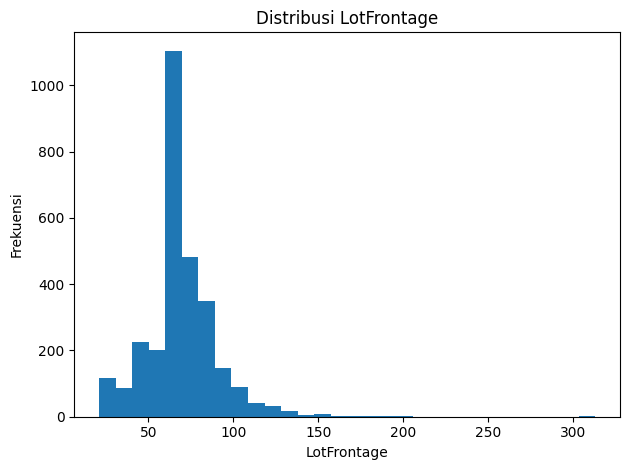

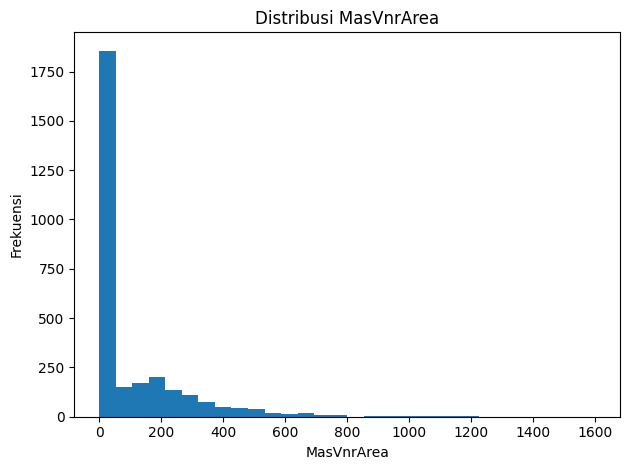

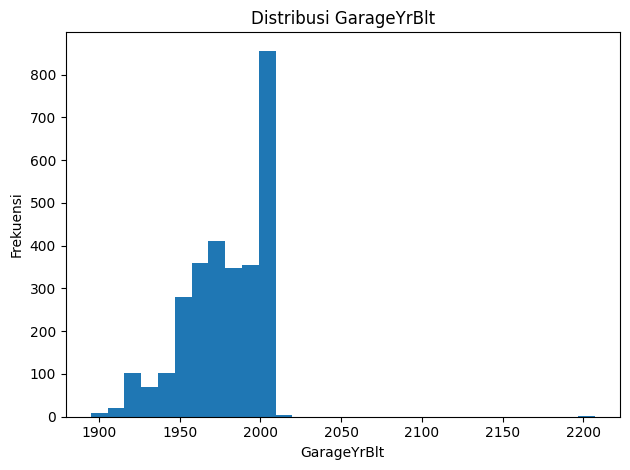

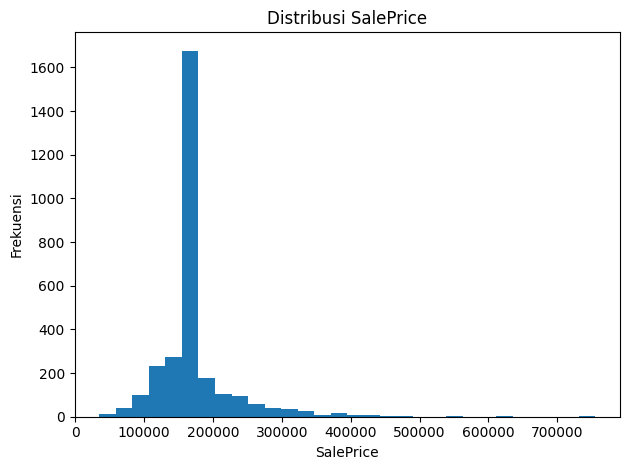

In [ ]:
cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']
for col in cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(False)
    plt.tight_layout()
    plt.show()


### Alasan data imputation dengan median agar data yang diinputkan tidak terlalu menjomplang, karena median mengambil nilai tengah. ya walaupun datanya tetep aja emang miring

# Feature Selection (20 poin)
1. Pilih 10 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)
2. Bagaimana cara Anda memilih 10 variabel tersebut? Kemukakan alasan Anda. (10 poin)


In [ ]:
df2 = pd.read_csv('/content/1_house_prince_advance.csv')
display(df2.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df2 = df2.drop(['Id', 'MSSubClass'], axis=1)

#Pilih 10 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)

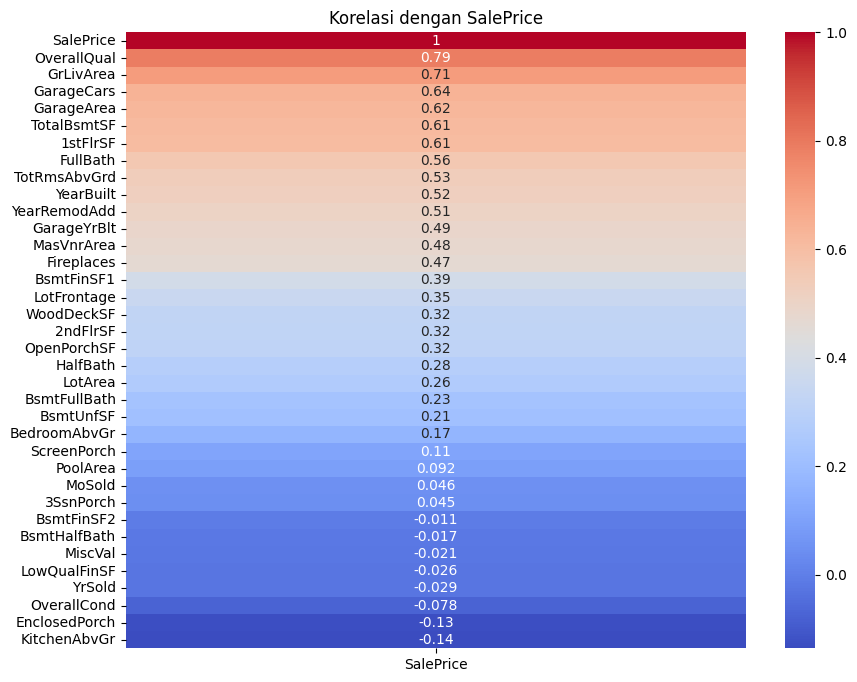


10 fitur terbaik dengan SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [ ]:
numeric_df2 = df2.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df2.corr()

correlation_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_saleprice.to_frame(), annot=True, cmap='coolwarm')
plt.title('Korelasi dengan SalePrice')
plt.show()

top_10 = correlation_saleprice.drop('SalePrice').head(10)
print("\n10 fitur terbaik dengan SalePrice:")
print(top_10)

#Bagaimana cara Anda memilih 10 variabel tersebut? Kemukakan alasan Anda. (10 poin)

### Untuk pemilihan 10 variabel tersebut, berdasarkan nilai korelasi setiap variabel dari yang tertinggi ke terendah dengan variabel SalePrice.

# Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)


In [ ]:
# pilih 10 fitur
selected_features = top_10.index.tolist()
df_selected = df2[selected_features].copy()
df_selected.dropna(inplace=True)

display(df_selected.head())

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2.0,548.0,856.0,856,2,8,2003,2003
1,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976
2,7,1786,2.0,608.0,920.0,920,2,6,2001,2002
3,7,1717,3.0,642.0,756.0,961,1,7,1915,1970
4,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000


In [ ]:
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2917 entries, 0 to 2918
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2917 non-null   int64  
 1   GrLivArea     2917 non-null   int64  
 2   GarageCars    2917 non-null   float64
 3   GarageArea    2917 non-null   float64
 4   TotalBsmtSF   2917 non-null   float64
 5   1stFlrSF      2917 non-null   int64  
 6   FullBath      2917 non-null   int64  
 7   TotRmsAbvGrd  2917 non-null   int64  
 8   YearBuilt     2917 non-null   int64  
 9   YearRemodAdd  2917 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 250.7 KB


In [ ]:
df_selected.isnull().sum()

,0
OverallQual,0
GrLivArea,0
GarageCars,0
GarageArea,0
TotalBsmtSF,0
1stFlrSF,0
FullBath,0
TotRmsAbvGrd,0
YearBuilt,0
YearRemodAdd,0


In [ ]:
scaler = StandardScaler()
X = df_selected
X = scaler.fit_transform(X)
print(X.dtype)

float64


Text(0, 0.5, 'Grlivearea')

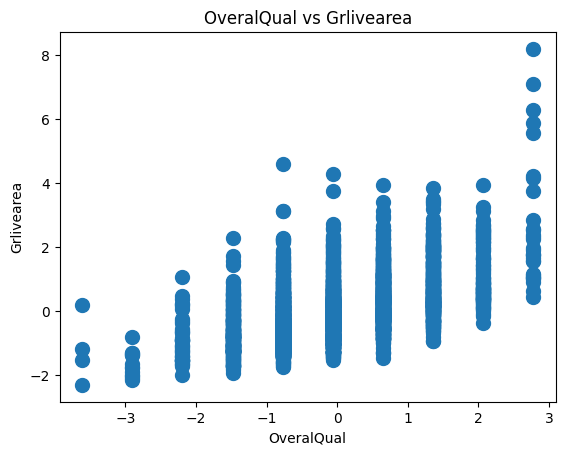

In [ ]:
plt.scatter(X[:,0], X[:,1], s = 100)
plt.title('OveralQual vs Grlivearea')
plt.xlabel('OveralQual')
plt.ylabel('Grlivearea')

#Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)

In [ ]:
inertia = []
silhouette_scores = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

#Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)

Text(0.5, 1.0, 'Elbow Optimal')

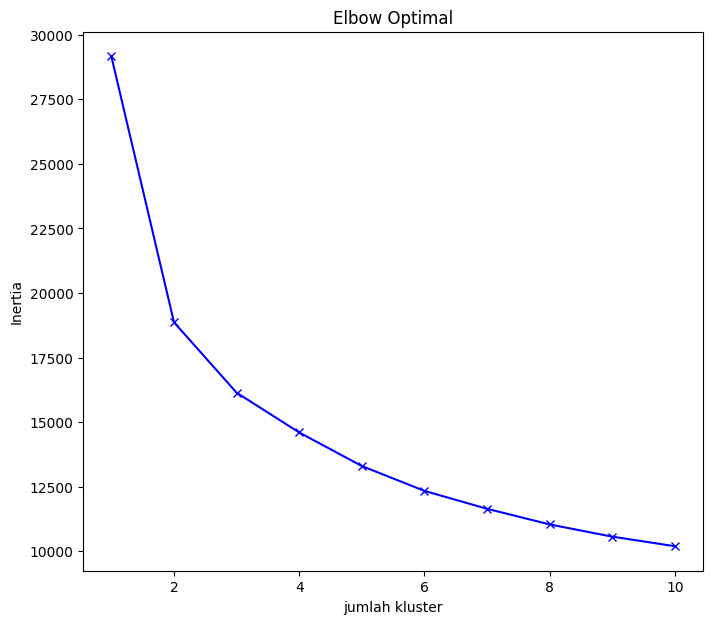

In [ ]:
plt.figure(figsize=(8, 7))

plt.plot(range(1, 11), inertia, "bx-")
plt.xlabel('jumlah kluster')
plt.ylabel('Inertia')
plt.title('Elbow Optimal')

### Jumlah kluster terbaik menurut elbow method itu 3 kalau dilihat dari grafiknya

#Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

In [ ]:
print("Skor Silhouette")
for k, score in zip(range(2, 11), silhouette_scores[1:]):
    print(f"k={k}: {score}")

optimal_k_silhouette = 0
max_silhouette_score = -1

for k, score in zip(range(2, 11), silhouette_scores[1:]):
    if score is not None and score > max_silhouette_score:
        max_silhouette_score = score
        optimal_k_silhouette = k

Skor Silhouette
k=2: 0.31325709708794125
k=3: 0.2460709760609675
k=4: 0.23991429702985176
k=5: 0.20899582625219656
k=6: 0.20213103052110437
k=7: 0.20402085261937336
k=8: 0.20957107058426747
k=9: 0.21118729322237942
k=10: 0.19287086888571298


### Nilai silhoutte menunjukkan jumlah kluster terbaik = 2. Kemudian terdapat perbedaan hasil antara ke dua metode, elbow menunjukkan 3 sementara silhoutte menunjukkan 2.

#Clustering - 2 (20 poin)
1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

#Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan?

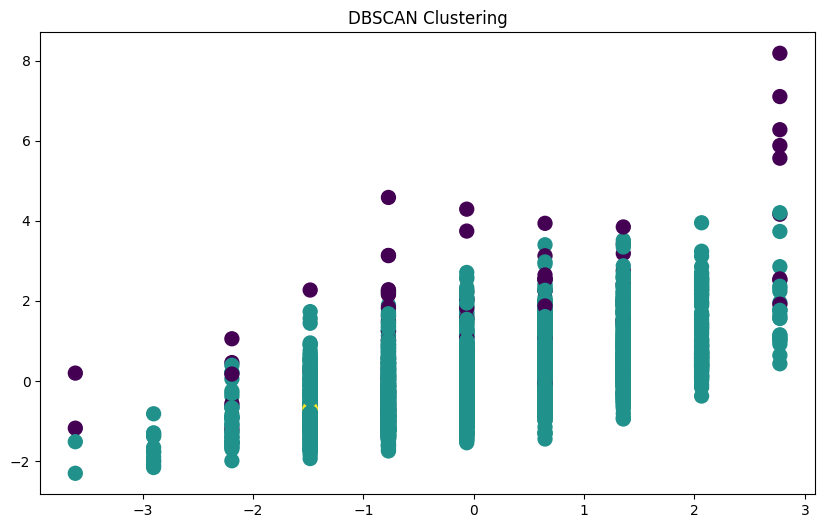

In [ ]:
dbscan = DBSCAN(eps=2, min_samples=4)
cluster_db = dbscan.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=100, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
print("Jumlah cluster dengan DBSCAN:", len(set(cluster_db)) - (1 if -1 in cluster_db else 0))

Jumlah cluster dengan DBSCAN: 2


#Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN?

In [ ]:
print("Silhoutte DBSCAN:", silhouette_score(X, cluster_db))
print("DBI DBSCAN:", davies_bouldin_score(X, cluster_db))

Silhoutte DBSCAN: 0.16666508615695244
DBI DBSCAN: 1.8649989539682188
